In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 221 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 8.0 MB 46.9 MB/s 
     |████████████████████████████████| 124 kB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.6 MB/s 
     |████████████████████████████████| 3.3 MB 37.4 MB/s 
     |████████████████████████████████| 1.6 MB 35.1 MB/s 
     |████████████████████████████████| 264 kB 38.1 MB/s 
     |████████████████████████████████| 2.6 MB 41.4 MB/s 
     |████████████████████████████████| 636 kB 45.3 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 49.7 MB/s 
     |████████████████████████████████| 170 kB 37.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 243 kB 54.8 MB/s 
     |████████████████████████████████| 118 kB 53.1 MB/s 
     |███████████████

simpletransformers==0.61.13


In [ ]:
!pip install tokenizers==0.10.3

In [ ]:
pip install -U ray

     |████████████████████████████████| 49.6 MB 5.3 kB/s 
     |████████████████████████████████| 72 kB 552 kB/s 


In [ ]:
data = pd.read_csv("/content/sample_data/AdjustedCleanTapasData.csv")

new_df = pd.DataFrame()
new_df = data[["Post", "Category"]]
categories = list(data.groupby(["Category"]).size().index)
new_df["Category"] = new_df.apply(lambda x:  categories.index(x["Category"]),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_df = new_df.reset_index(drop=True)
train_df, test_df = train_test_split(new_df, test_size=0.10)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
test_df.head()

,Post,Category
0,contest draw the least cute chibi win tapa ink...,2
1,follow darkness searching first subscriber hel...,4
2,free ink queer creator make gl content hello w...,3
3,ha author personality turned continuing readin...,5
4,playing long game recently noticed gotten comf...,0


In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base",
    num_labels=len(categories),
    args=train_args,
)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/7831 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

(3916, 0.8642440304931622)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/871 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
result

{'acc': 0.7152698048220436,
 'eval_loss': 0.988365825966274,
 'f1': 0.7152698048220436,
 'mcc': 0.6796239483197314}

In [ ]:
model_outputs

array([[ 0.68633527, -0.3843087 ,  6.29142237, ..., -1.23849154,
        -0.8089875 , -1.86295485],
       [-0.13302614, -1.77226675, -1.30675375, ..., -0.96290618,
        -2.35496807,  2.59256268],
       [ 1.72141671, -0.71415979,  1.37314308, ..., -1.37613654,
        -3.08618021, -1.48072529],
       ...,
       [-0.91162992, -1.54229093, -1.83954597, ...,  2.91041827,
        -1.70699894,  4.78537846],
       [-1.3038559 , -1.31447256,  0.83381283, ..., -1.20459056,
         6.42382622, -0.83903635],
       [-0.67811871, -1.31459737, -0.98983419, ...,  6.44793892,
        -1.04251516,  1.07361293]])

In [ ]:
predictions, raw_outputs = model.predict(list(test_df["Post"]))

  0%|          | 0/871 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

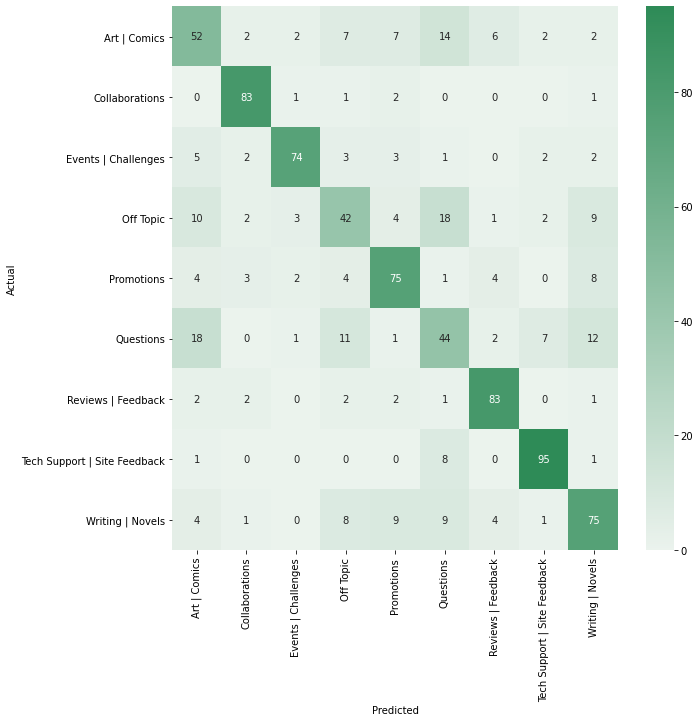

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
conf_mat = confusion_matrix(test_df["Category"], predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','tapas-categ-class')